In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

## Load data

In [2]:
data = yf.download("AAPL", start="2023-01-01", end="2024-01-01")[('Close','AAPL')]

/tmp/ipykernel_890/2685695273.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2023-01-01", end="2024-01-01")[('Close','AAPL')]
[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Date
2023-01-03    123.211212
2023-01-04    124.482033
2023-01-05    123.161949
2023-01-06    127.693565
2023-01-09    128.215668
Name: (Close, AAPL), dtype: float64

In [4]:
data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Series name: ('Close', 'AAPL')
Non-Null Count  Dtype  
--------------  -----  
250 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


## Returns

In [5]:
# Simple returns
simple_returns = data.pct_change().dropna()    #dropna to remove NaN values, because in 1st day is no previous row to calculate the change.
simple_returns.head()

Date
2023-01-04    0.010314
2023-01-05   -0.010605
2023-01-06    0.036794
2023-01-09    0.004089
2023-01-10    0.004457
Name: (Close, AAPL), dtype: float64

In [6]:
# log returns
log_returns = np.log(data / data.shift(1)).dropna()
log_returns.head()

Date
2023-01-04    0.010261
2023-01-05   -0.010661
2023-01-06    0.036133
2023-01-09    0.004080
2023-01-10    0.004447
Name: (Close, AAPL), dtype: float64

### Plotting returns
simple return and log return over a year in same graph

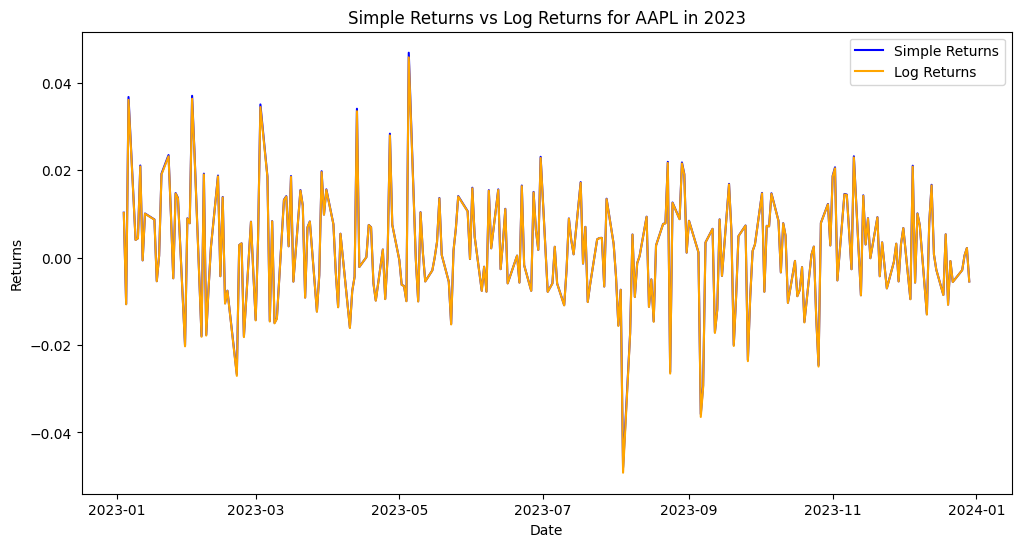

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(simple_returns.index, simple_returns, label='Simple Returns', color='blue')
plt.plot(log_returns.index, log_returns, label='Log Returns', color='orange')
plt.title('Simple Returns vs Log Returns for AAPL in 2023')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()

plt.show()

## Volatality

In [8]:
# daily standard deviation(volatility)
vol_daily = log_returns.std()
vol_daily

np.float64(0.012549814595792833)

In [9]:
# annualized volatility
vol_annualized = vol_daily * np.sqrt(252)  # Assuming 252 trading
vol_annualized

np.float64(0.19922213052261856)

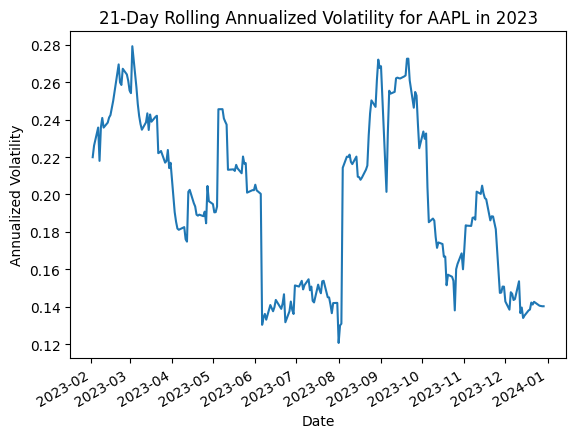

In [10]:
rolling_vol = log_returns.rolling(window=21).std() * np.sqrt(252)
rolling_vol.plot()
plt.title('21-Day Rolling Annualized Volatility for AAPL in 2023')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.show()

## Sharpe Ratio
comparing SR of 2 stocks on a risk-adjusted basis.

In [11]:
# gathering data
SPY_data = yf.download("SPY", start="2023-01-01", end="2024-01-01")[('Close','SPY')]
MSFT_data = yf.download("MSFT", start="2023-01-01", end="2024-01-01")[('Close','MSFT')]

# calculating log returns
SPY_log_returns = np.log(SPY_data / SPY_data.shift(1)).dropna()
MSFT_log_returns = np.log(MSFT_data / MSFT_data.shift(1)).dropna()

# SHARPE RATIO
risk_free_rate = 0.02  # 2% annual risk-free rate
SPY_sharpe = (SPY_log_returns.mean() * 252 - risk_free_rate) / (SPY_log_returns.std() * np.sqrt(252))
MSFT_sharpe = (MSFT_log_returns.mean() * 252 - risk_free_rate) / (MSFT_log_returns.std() * np.sqrt(252))

SPY_sharpe, MSFT_sharpe

/tmp/ipykernel_890/517759538.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  SPY_data = yf.download("SPY", start="2023-01-01", end="2024-01-01")[('Close','SPY')]
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_890/517759538.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  MSFT_data = yf.download("MSFT", start="2023-01-01", end="2024-01-01")[('Close','MSFT')]
[*********************100%***********************]  1 of 1 completed


(np.float64(1.6785901219564665), np.float64(1.7800742804327754))

## Drawdown

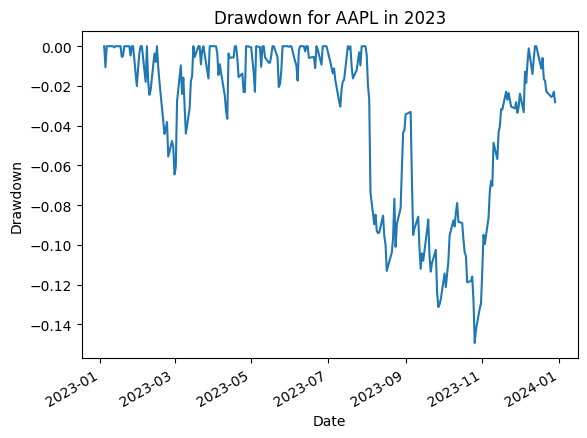

In [12]:
cumulative_returns = (1+simple_returns).cumprod()
rolling_max = cumulative_returns.cummax()
drawdown = cumulative_returns / rolling_max - 1
drawdown.plot()
plt.title('Drawdown for AAPL in 2023')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.show()